# Predicting if a person would buy life insurnace based on his age using logistic regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


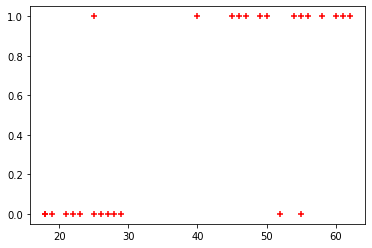

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
20,21
12,27
17,58
5,56
11,28
3,52


In [7]:
y_test

20    0
12    0
17    1
5     1
11    0
3     0
Name: bought_insurance, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
X_test

,age
20,21
12,27
17,58
5,56
11,28
3,52


In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.89126247, 0.10873753],
       [0.77345904, 0.22654096],
       [0.03568156, 0.96431844],
       [0.04720638, 0.95279362],
       [0.74686996, 0.25313004],
       [0.08158286, 0.91841714]])

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
y_predicted

array([0, 0, 1, 1, 0, 1])

In [15]:
X_test

,age
20,21
12,27
17,58
5,56
11,28
3,52


model.coef_ indicates value of m in y=m*x + b equation

In [16]:
model.coef_

array([[0.14595918]])

In [17]:
model.intercept_

array([-5.16884475])

Defining sigmoid function and math

In [18]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [20]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [21]:
age = 43
prediction_function(age)

0.568565299077705

0.568 is more than 0.5 which means person with 43 will buy the insurance